- - - -
# Mechpy
a mechanical engineer's toolbox 

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

## Math  

[Differential Equations](#Differential-Equations)  
[Linear Algebra](#Linear-Algebra)  
[Signal Processing](#Signal-Processing)  
[Curve Fitting](#Curve-Fitting)   
[plotting](#Plotting)  
- - - -


This is more or less my notes on using python for a variety of engineering tasks, including plotting, solving equations, linear algebra etc. Some of this work is my own, but many of it is from the scipy documentation.

## Python Initilaization with module imports

In [18]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

#get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

## Curve-Fitting 
[index](#Mechpy)  


In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(0, 12)

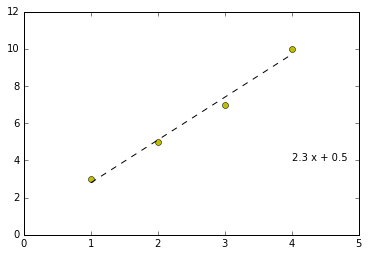

In [2]:
#==============================================================================
# Method 1 - polyfit
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.text(4,4,fit_fn)
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968
 ------------------------------------------ 
           6           5           4          3          2
-0.001269 x + 0.01071 x + 0.01711 x - 0.2894 x + 0.2772 x + 0.7857 x


C:\Users\nealio\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


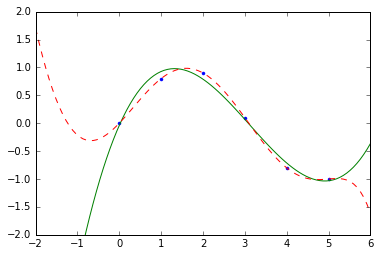

In [3]:
import matplotlib.pyplot as plt

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)

p = np.poly1d(z)
print(p)

p6 = np.poly1d(np.polyfit(x, y, 6))
print(' ------------------------------------------ ')
print(p6)

xp = np.linspace(-2, 6, 100)
plt.plot(x, y, '.', xp, p(xp), '-', xp, p6(xp), '--')
plt.ylim(-2,2)

plt.show()

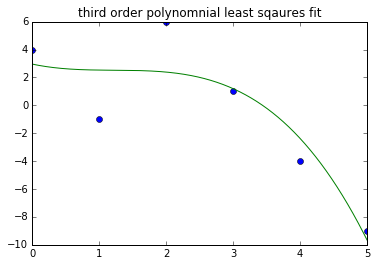

In [4]:
#==============================================================================
# Hmk from numerical methods class
#==============================================================================
X = np.array([0,  1, 2, 3,  4,  5])
Y = np.array([4, -1, 6, 1, -4, -9])
order=3 # integer > 0
C = np.polyfit(X,Y,order);
C = np.flipud(C)

h = 1000
xfit = np.linspace(min(X),max(X),h);
yfit = np.zeros(len(xfit))

for i,c in enumerate(C):
    yfit += c*xfit**i

plt.plot(X,Y,'o',xfit,yfit)
plt.title('third order polynomnial least sqaures fit')
plt.show()

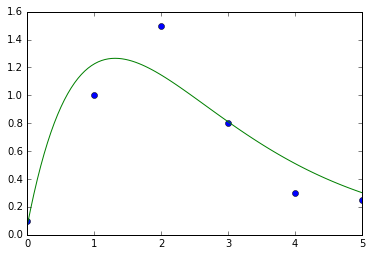

In [5]:
#==============================================================================
# non-linear least squares
#==============================================================================

from scipy.optimize import curve_fit
X = np.array([0 ,   1 , 2 ,   3 ,   4 ,   5 ])
Y = np.array([0.1,  1 , 1.5 , 0.8 , 0.3 , 0.25 ])
fn = lambda a: (a[0]*X+a[1]) * np.exp(a[2]*X+a[3])
Sn = lambda x: np.sum( (fn(x)-Y)**2 )
A = sp.optimize.fmin(func=Sn, x0=[0,0,0,0])
plt.plot(X, Y,'o')
xplot = np.linspace(0,5,100)
fnfit = lambda x,a: (a[0]*x+a[1]) * np.exp(a[2]*x+a[3])
plt.plot(xplot, fnfit(xplot, A))

Optimization terminated successfully.
         Current function value: 0.015158
         Iterations: 109
         Function evaluations: 208
[ 0.49404038  3.96935945]


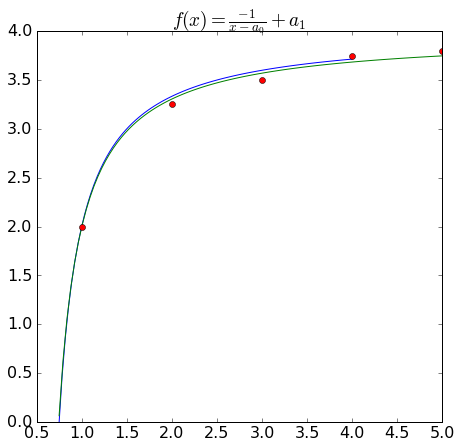

In [6]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize=(16,7))
mpl.rcParams['font.size'] = 16

X = np.array([1, 2,    3,   4 ,    5 ])
Y = np.array([2, 3.25, 3.5, 3.75 , 3.8])

# a[0] is the x asymptote and a[1] is the y asymptote and 
fn = lambda a: -1/(X-a[0]) + a[1]
Sn = lambda x: np.sum( (fn(x)-Y)**2 )

A = scipy.optimize.fmin(func=Sn, x0=[0,0])
print(A)
plt.plot(X, Y,'o')
xplot = np.linspace(0.75 , 5,100)
fnfit = lambda x,a: -1/(x-a[0]) + a[1]

plt.subplot(1,2,1)
eps = 1e-16
xp = 0.5
yp = 4
x = np.linspace(xp,4,100)
y = -1/(x-xp+eps)+yp
plt.plot(x,y)
plt.ylim([0,yp])
plt.title('plot of how the function should look with actual parameters')


plt.plot(xplot, fnfit(xplot, A))
plt.plot(X,Y, 'o')
plt.title(r'$f(x)=\frac{-1}{x-a_0}+a_1$')
#plt.text(2,1,r'$f(x)=\frac{-1}{x-0.494}+3.969$')

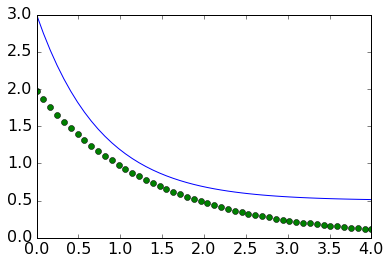

In [7]:
#==============================================================================
# 
#==============================================================================
import numpy as np
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + np.random.normal(size=len(xdata))
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))

plt.plot(xdata, y)

yfit = func(xdata, popt[0], popt[1], popt[2])
plt.plot(xdata, yfit, 'o')

## Linear Algebra with Python
[index](#Mechpy)  

Python's numpy package allows python, a generic computing language to perform powerful mathematical calculations. Although python's math syntax is not as obvious as MATLAB's, the functionality is comparable. This document is designed to be an intro to that syntax 

Some references

http://nbviewer.ipython.org/github/carljv/cython_testing/blob/master/cython_linalg.ipynb

We can either use scipy, which includes numpy, 
http://docs.scipy.org/doc/

or use numpy directly
http://docs.scipy.org/doc/numpy/

Since there are many ways to solve linear algebra problems, (eg Octave/Matlab, julia, scipy, numpy)
I tend to prefer the most matlabesc approaches due to the ubiquity of Matlab and the simplicity of the syntax, which frankly, python suffers with.

The major difference between arrays and matrices in python is that arrays are n-dimensions, where matrices are only up to 2-dimensions  
m

In [ ]:
import numpy as np
from scipy import linalg

Pythons list is a generic data storage object. it can be easily extended to a numpy array, which is specialized for numerical and scientific computation 

In [88]:
np.zeros((5,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [89]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [90]:
np.matrix(np.zeros((5,3)))

matrix([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [91]:
np.matrix([[1,2],[3,4]])

matrix([[1, 2],
        [3, 4]])

In [92]:
# Matrix multiplication can be achieved using the dot method
i = [[1,0,0],[0,1,0],[0,0,1]]  # identiy matrix
a = [[4,3,1],[5,7,2],[2,2,2]]
np.dot(i,a)


array([[4, 3, 1],
       [5, 7, 2],
       [2, 2, 2]])

In [93]:
#Or, matrix multiplication can be done if a matrix is explicitly defined
np.matrix(i)*np.matrix(a)

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [94]:
# Notice, when arrays are mutliplied, we get the dot product 
np.array(i)*np.array(a)

array([[4, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [95]:
# convert an array to a matrix
m = np.matrix(a)
m

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [96]:
m.T  # transpose

matrix([[4, 5, 2],
        [3, 7, 2],
        [1, 2, 2]])

In [97]:
m.I  # inverse

matrix([[ 0.55555556, -0.22222222, -0.05555556],
        [-0.33333333,  0.33333333, -0.16666667],
        [-0.22222222, -0.11111111,  0.72222222]])

In [98]:
m**2

matrix([[33, 35, 12],
        [59, 68, 23],
        [22, 24, 10]])

In [99]:
np.array(a)**2

array([[16,  9,  1],
       [25, 49,  4],
       [ 4,  4,  4]])

In [102]:
m

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [103]:
m[:,2]

matrix([[1],
        [2],
        [2]])

In [104]:
m[2,:]

matrix([[2, 2, 2]])

In [105]:
m[:2,:2]

matrix([[4, 3],
        [5, 7]])

In [107]:
m[1:,1:]

matrix([[7, 2],
        [2, 2]])

## Sympy Linear Algebra

In [4]:
# import sympy
import sympy as sp
#from sympy.mpmath import *

In [5]:
x = sp.Symbol('x')   # x = var('x')
M = sp.Matrix([[2,x],[x,3]])
M

⎡2  x⎤
⎢    ⎥
⎣x  3⎦

In [4]:
M.eigenvals()

⎧     __________            __________       ⎫
⎪    ╱    2                ╱    2            ⎪
⎨  ╲╱  4⋅x  + 1    5     ╲╱  4⋅x  + 1    5   ⎬
⎪- ───────────── + ─: 1, ───────────── + ─: 1⎪
⎩        2         2           2         2   ⎭

In [6]:
M.eigenvects()

⎡⎛     __________                              ⎞  ⎛   __________              
⎢⎜    ╱    2                                   ⎟  ⎜  ╱    2                   
⎢⎜  ╲╱  4⋅x  + 1    5     ⎡⎡       -x        ⎤⎤⎟  ⎜╲╱  4⋅x  + 1    5     ⎡⎡   
⎢⎜- ───────────── + ─, 1, ⎢⎢─────────────────⎥⎥⎟, ⎜───────────── + ─, 1, ⎢⎢───
⎢⎜        2         2     ⎢⎢   __________    ⎥⎥⎟  ⎜      2         2     ⎢⎢   
⎢⎜                        ⎢⎢  ╱    2         ⎥⎥⎟  ⎜                      ⎢⎢   
⎢⎜                        ⎢⎢╲╱  4⋅x  + 1    1⎥⎥⎟  ⎜                      ⎢⎢  ╲
⎢⎜                        ⎢⎢───────────── - ─⎥⎥⎟  ⎜                      ⎢⎢- ─
⎢⎜                        ⎢⎢      2         2⎥⎥⎟  ⎜                      ⎢⎢   
⎢⎜                        ⎢⎢                 ⎥⎥⎟  ⎜                      ⎢⎢   
⎣⎝                        ⎣⎣        1        ⎦⎦⎠  ⎝                      ⎣⎣   

                  ⎞⎤
                  ⎟⎥
     -x         ⎤⎤⎟⎥
────────────────⎥⎥⎟⎥
  __________    ⎥⎥⎟⎥
 ╱    2         ⎥⎥⎟⎥
╱  4

In [7]:
M.eigenvects()[1][0]

   __________    
  ╱    2         
╲╱  4⋅x  + 1    5
───────────── + ─
      2         2

In [8]:
Mval = M.eigenvects()[1][0]
Mval.evalf(subs={x:3.14})

5.67955971794838

In [10]:
print(sp.latex(M))

\left[\begin{matrix}2 & x\\x & 3\end{matrix}\right]


copy and paste into markdown 

$ \left[\begin{matrix}2 & x\\x & 3\end{matrix}\right] $


## Signal Processing
Page 174 Introduction for python for Science - David Pine

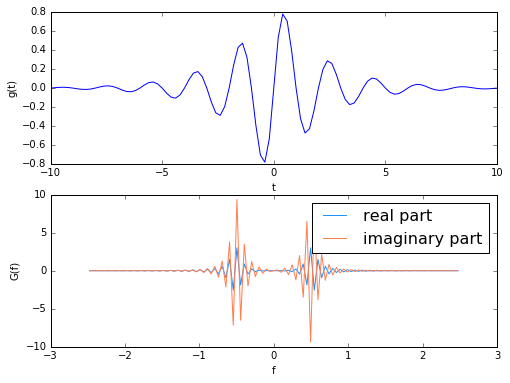

In [4]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline') # inline plotting
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # linearly space time array
g = np.exp(-np.abs(t)/width)*np.sin(2.0 * np.pi * freq * t)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max
G = fftpack.fftshift(G) # shift G order to coorespond to f
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('G(f)')
plt.show()

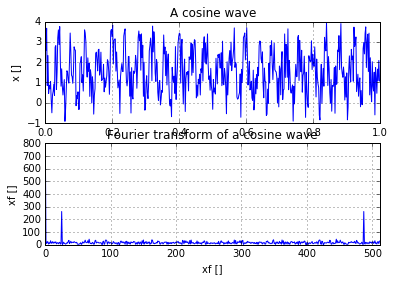

In [5]:
from pylab import *
from scipy import fft
get_ipython().magic('matplotlib inline') # inline plotting
N = 2**9
F = 25
t = arange(N)/float(N)
x = cos(2*pi*t*F) + rand(len(t))*3
subplot(2,1,1)
plot(t,x)
ylabel('x []')
xlabel('t [seconds]')
title('A cosine wave')
grid()

subplot(2,1,2)
f = t*N
xf = fft(x)
plot(f,abs(xf))
title('Fourier transform of a cosine wave')
xlabel('xf []')
ylabel('xf []')
xlim([0,N])
grid()
show()

# note the spike at 25 hz and 512-25

# Engineering Mathematics with Python
[index](#Mechpy)

In [3]:
from numpy import *

In [4]:
r_[1:11]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
linspace(1,10,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

## Functions
[index](#Index) 

In [28]:
import sympy as sp
s,ed = sp.symbols('s,ed')
K = sp.Function('K')

Ked = 0.4*ed+.2
Ks = 0.105*s+0.63 

Ktot = Ked*Ks
sp.expand(Ktot)

In [29]:
Ktot = sp.lambdify((ed,s), (0.4*ed+.2)*(0.105*s+0.63))
K(2,3.54)

In [30]:
di,df,t = sp.symbols('d_i,d_f,t')

In [31]:
from sympy.utilities.lambdify import lambdify, implemented_function

In [32]:
sb = implemented_function(sp.Function('sb'), lambda di,t: 11445*(di/t)**3 -70429*(di/t)**2 + 145552*(di/t)  )

In [33]:
Kdt = implemented_function(sp.Function('Kdt'), \
                           lambda di,t,df: 11445/sb(di, t)*(df/t)**3 - \
                           70429/sb(di, t)*(df/t)**2 + 145552/sb(di, t)*(df/t)  )

In [34]:
Kdt(0.1875, 0.25, 0.246)

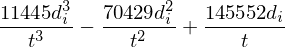

In [35]:
sb = sp.Function('sb')
sb = 11445*(di/t)**3 -70429*(di/t)**2 + 145552*(di/t)
sb

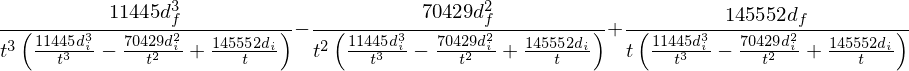

In [36]:
Kdt = sp.Function('Kdt')
Kdt = 11445/sb*(df/t)**3 - 70429/sb*(df/t)**2 + 145552/sb*(df/t)
Kdt

In [37]:
Kdt = sp.simplify(Kdt)

In [38]:
sp.latex(Kdt)

'\\frac{d_{f} \\left(11445 d_{f}^{2} - 70429 d_{f} t + 145552 t^{2}\\right)}{d_{i} \\left(11445 d_{i}^{2} - 70429 d_{i} t + 145552 t^{2}\\right)}'

# Engineering Python   
[index](#Mechpy)  

to plot inline in the ipython console or jupyter notebook, otherwise plots will be in the a seperate window

to turn on inline plotting
```python
from IPython import get_ipython
get_ipython().magic('matplotlib inline')
#or
%matplotlib inline
```

to turn off inline plotting
```python
get_ipython().magic('matplotlib')
#or
%matplotlib
#or 
%matplotlib qt
```


## Symbolic mathematics with sympy

In [3]:
# import sympy library and initialize latex printing
import sympy as sp
#sp.init_printing()
#sp.init_printing(use_latex='matplotlib')
sp.init_printing(use_latex='mathjax')

In [4]:
# add a symbolic character
x = sp.Symbol('x')

In [5]:
sp.sqrt(x**2)

   ____
  ╱  2 
╲╱  x  

In [6]:
r = sp.Rational(11, 13)
r

11
──
13

In [7]:
float(r)

0.8461538461538461

In [8]:
f = sp.Function('f')
f

f

In [9]:
f(x)

f(x)

In [10]:
h = sp.Lambda(x,x**2)
h

     2
x ↦ x 

In [11]:
w = 2*(x**2-x)-x*(x+1)
w

   2                  
2⋅x  - x⋅(x + 1) - 2⋅x

In [12]:
w.args

⎛         2            ⎞
⎝-2⋅x, 2⋅x , -x⋅(x + 1)⎠

In [13]:
sp.simplify(w)

x⋅(x - 3)

In [14]:
sp.factor(x**2-1)

(x - 1)⋅(x + 1)

In [15]:
#partial fractions
y = 1/(x**2+3*x+2)
y

     1      
────────────
 2          
x  + 3⋅x + 2

In [16]:
sp.apart(y,x)

    1       1  
- ───── + ─────
  x + 2   x + 1

In [17]:
f = sp.Function('f')(x)
sp.diff(f,x)

d       
──(f(x))
dx      

In [18]:
y = sp.Symbol('y')
g = sp.Function('g')(x,y)
g.diff(x,y)

   2          
  ∂           
─────(g(x, y))
∂y ∂x         

In [19]:
a,b,c,d = sp.symbols("a b c d")
M = sp.Matrix([[a,b],[c,d]])
M

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

In [20]:
M*M

⎡ 2                  ⎤
⎢a  + b⋅c   a⋅b + b⋅d⎥
⎢                    ⎥
⎢                  2 ⎥
⎣a⋅c + c⋅d  b⋅c + d  ⎦

In [21]:
# if ipython is to be used as a calculator initialize with 
from sympy import init_session
init_session() 

IPython console for SymPy 1.0 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [22]:
from sympy import oo, Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import sympy as sp
import numpy as np
import matplotlib.pyplot as mp
get_ipython().magic('matplotlib inline')
# this will print output as unicode

In [23]:
# assign a sympy variable
x = sp.var('x')
x

In [24]:
#assign a function 
f =  sp.sin(6*x)*sp.exp(-x)
f

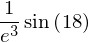

In [25]:
f.subs(x,3)

In [26]:
float(f.subs(x,3))

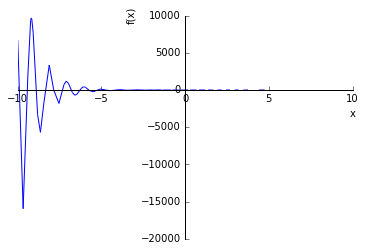

In [27]:
sp.plot(f)

In [28]:
# a onetime pretty print
sp.pprint(f)

 -x         
ℯ  ⋅sin(6⋅x)


In [29]:
#or we can print the latex rendering
sp.latex(f)

'e^{- x} \\sin{\\left (6 x \\right )}'

In [30]:
# first derivative
df = f.diff()
df

In [31]:
# differentaite f'' wrt x
sp.diff(f,x,1)

In [32]:
# substitute x with pi
f.subs(x,np.pi)

In [33]:
#%% Numeric Computation from the documentation
from sympy.abc import x

In [34]:
# lambdify using the math module, 10^2 faster than subs
expr = sp.sin(x)/x
f = sp.lambdify(x,expr)
f(3.14)

In [35]:
# lambdify using numpy
expr = sp.sin(x)/x
f = sp.lambdify(x,expr, "numpy")
f(np.linspace(1,3.14,20))

array([  8.41470985e-01,   8.06076119e-01,   7.67912588e-01,
         7.27262596e-01,   6.84424864e-01,   6.39711977e-01,
         5.93447624e-01,   5.45963742e-01,   4.97597617e-01,
         4.48688937e-01,   3.99576866e-01,   3.50597122e-01,
         3.02079129e-01,   2.54343238e-01,   2.07698064e-01,
         1.62437944e-01,   1.18840569e-01,   7.71647744e-02,
         3.76485431e-02,   5.07214305e-04])

In [37]:
z = np.arange(0,6,.1)
z

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9])

In [39]:
# create an array from 0 to 6 with 300 points
z = np.linspace(0,6,30)
z

array([ 0.        ,  0.20689655,  0.4137931 ,  0.62068966,  0.82758621,
        1.03448276,  1.24137931,  1.44827586,  1.65517241,  1.86206897,
        2.06896552,  2.27586207,  2.48275862,  2.68965517,  2.89655172,
        3.10344828,  3.31034483,  3.51724138,  3.72413793,  3.93103448,
        4.13793103,  4.34482759,  4.55172414,  4.75862069,  4.96551724,
        5.17241379,  5.37931034,  5.5862069 ,  5.79310345,  6.        ])

## Differential Equations

In [10]:
# see here for example scripts
# C:\Users\Neal\Anaconda3\Lib\site-packages\sympy\mpmath\tests
from sympy import Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import numpy as np
import sympy as sp
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt

In [19]:
f = Function('f')
deq = dsolve(Derivative(f(x), x,x) + 9*f(x), f(x))
deq

f(x) = C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)

In [20]:
diffeq1_sym = deq.args[1]
diffeq1_sym

C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)

In [21]:
diffeq1 = diffeq1_sym.subs({'C1':1, 'C2':0.5})
diffeq1

sin(3⋅x) + 0.5⋅cos(3⋅x)

In [22]:
diffeq1_f = sp.lambdify(x,diffeq1, "numpy")
diffeq1_f

<function numpy.<lambda>>

In [23]:
diffeq1arr = diffeq1_f(np.linspace(1,3.14,20))
diffeq1arr

array([-0.35387624, -0.68544104, -0.93948885, -1.08728921, -1.11212728,
       -1.0111941 , -0.79590429, -0.49060511, -0.12982305,  0.24564078,
        0.59332492,  0.87390954,  1.05566313,  1.11803104,  1.05396004,
        0.87069598,  0.5889643 ,  0.24062625, -0.1349244 , -0.49521635])

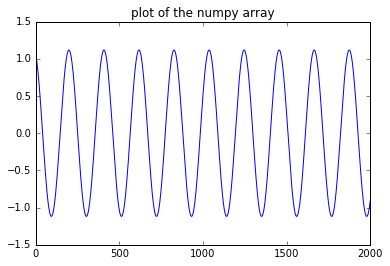

In [24]:
plt.plot(diffeq1_f(np.linspace(-10,10,2000)));
plt.title('plot of the numpy array');

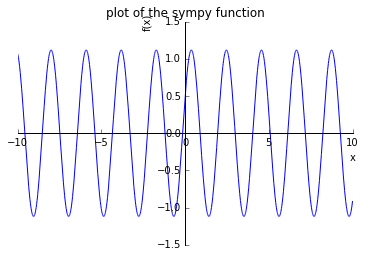

In [25]:
sp.plot(diffeq1, title='plot of the sympy function');

In [26]:
eq = sin(x)*cos(f(x)) + cos(x)*sin(f(x))*f(x).diff(x)
dsolve(eq, hint='1st_exact')

⎡             ⎛  C₁  ⎞                   ⎛  C₁  ⎞⎤
⎢f(x) = - acos⎜──────⎟ + 2⋅π, f(x) = acos⎜──────⎟⎥
⎣             ⎝cos(x)⎠                   ⎝cos(x)⎠⎦

In [27]:
#or
dsolve(eq, hint='almost_linear')

⎡             ⎛      C₁     ⎞                   ⎛      C₁     ⎞⎤
⎢f(x) = - acos⎜─────────────⎟ + 2⋅π, f(x) = acos⎜─────────────⎟⎥
⎢             ⎜   __________⎟                   ⎜   __________⎟⎥
⎢             ⎜  ╱     2    ⎟                   ⎜  ╱     2    ⎟⎥
⎣             ⎝╲╱  -cos (x) ⎠                   ⎝╲╱  -cos (x) ⎠⎦

In [28]:
t = symbols('t')
x,y = symbols('x, y', function=True)

In [29]:
eq = (Eq(Derivative(x(t),t), 12*t*x(t) + 8*y(t)), Eq(Derivative(y(t),t), 21*x(t) + 7*t*y(t)))
dsolve(eq)

⎡                     ⌠                                             ⎛   ⌠     
⎢                     ⎮    ⌠         ⌠                              ⎜   ⎮    ⌠
⎢                     ⎮    ⎮ 7⋅t dt  ⎮ 12⋅t dt                      ⎜   ⎮    ⎮
⎢                     ⎮    ⌡         ⌡                              ⎜   ⎮    ⌡
⎢                     ⎮ 8⋅ℯ        ⋅ℯ                               ⎜   ⎮ 8⋅ℯ 
⎢x(t) = C₁⋅x₀ + C₂⋅x₀⋅⎮ ────────────────────── dt, y(t) = C₁⋅y₀ + C₂⎜y₀⋅⎮ ────
⎢                     ⎮            2                                ⎜   ⎮     
⎢                     ⎮          x₀                                 ⎜   ⎮     
⎣                     ⌡                                             ⎝   ⌡     

                                            ⎞⎤
         ⌠               ⌠         ⌠        ⎟⎥
 7⋅t dt  ⎮ 12⋅t dt       ⎮ 7⋅t dt  ⎮ 12⋅t dt⎟⎥
         ⌡               ⌡         ⌡        ⎟⎥
       ⋅ℯ               ℯ        ⋅ℯ         ⎟⎥
────────────────── dt + ────────────────────⎟⎥
      

In [30]:
eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)), Eq(Derivative(y(t),t),y(t)**2*sin(t)))
dsolve(eq)

   ⎛⎡              C₁                          ⎤⎞
   ⎜⎢            -ℯ                     -1     ⎥⎟
set⎜⎢x(t) = ───────────────, y(t) = ───────────⎥⎟
   ⎜⎢           C₁                  C₁ - cos(t)⎥⎟
   ⎝⎣       C₂⋅ℯ   - cos(t)                    ⎦⎠

In [31]:
#pretty plots
from sympy import sin, symbols, dsolve, pprint, Function
from sympy.solvers.ode import odesimp
x,u2,C1 = symbols('x,u2,C1')
f = Function('f')
eq = dsolve(x*f(x).diff(x) - f(x) - x*sin(f(x)/x), f(x), hint='1st_homogeneous_coeff_subs_indep_div_dep_Integral', simplify=False)
eq2 = odesimp(eq, f(x), 1, set([C1]), hint='1st_homogeneous_coeff_subs_indep_div_dep')

In [32]:
eq

                       x                         
                      ────                       
                      f(x)                       
                       ⌠                         
                       ⎮    ⎛        1   ⎞       
                       ⎮   -⎜u₂ + ───────⎟       
                       ⎮    ⎜        ⎛1 ⎞⎟       
                       ⎮    ⎜     sin⎜──⎟⎟       
                       ⎮    ⎝        ⎝u₂⎠⎠       
log(f(x)) = log(C₁) +  ⎮   ──────────────── d(u₂)
                       ⎮           2             
                       ⎮         u₂              
                       ⌡                         
                                                 

In [33]:
eq2

f(x) = 2⋅x⋅atan(C₁⋅x)

In [34]:
f = Function('f')
eq = dsolve(2*x*f(x) + (x**2 + f(x)**2)*f(x).diff(x), f(x), hint = '1st_homogeneous_coeff_best', simplify=False)
eq

                         ⎛    2    ⎞
                         ⎜ 3⋅x     ⎟
                      log⎜───── + 1⎟
                         ⎜ 2       ⎟
                         ⎝f (x)    ⎠
log(f(x)) = log(C₁) - ──────────────
                            3       

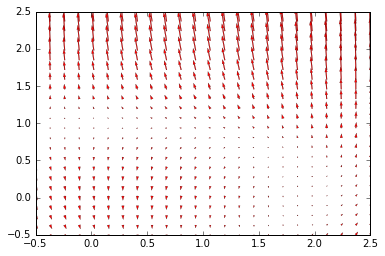

In [37]:
f=lambda x: [x[0]**2 - 2*x[0] - x[1] + 0.5, x[0]**2 + 4*x[1]**2 - 4]
x,y=np.mgrid[-0.5:2.5:24j,-0.5:2.5:24j]
U,V=f([x,y])
plt.quiver(x,y,U,V,color='r', \
         linewidths=(0.2,), edgecolors=('k'), \
         headaxislength=5)
plt.show()

## Plotting 

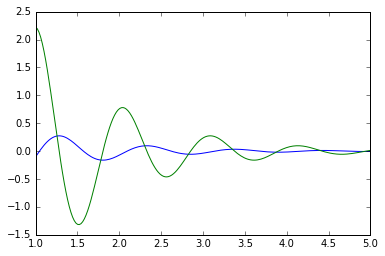

In [38]:
# one way to plot using symbolic math
x = sp.var('x')
f =  sp.sin(6*x)*sp.exp(-x)
df = f.diff()
w = np.array([f.subs(x,k) for k in z])
dw = np.array([df.subs(x,k) for k in z])

plt.plot(z,w,z,dw);

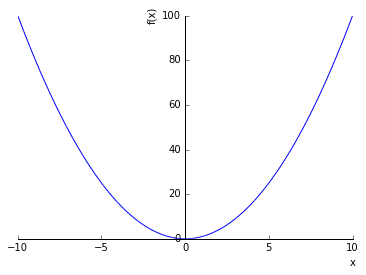

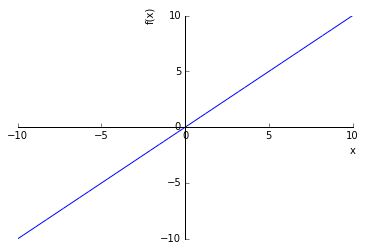

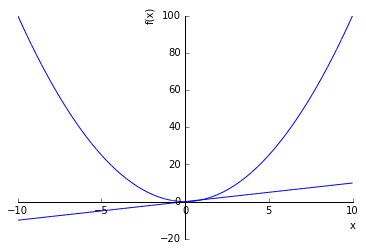

In [39]:
#%% Sympy Plotting

# shows two plots together
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x)
p2 = plot(x)
p1.extend(p2)
p1.show()

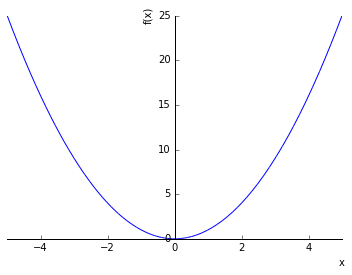

In [83]:
#single plot with range
plot(x**2, (x,-5,5));

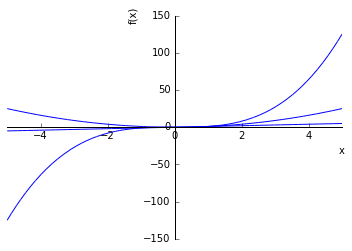

In [84]:
#multiple plots with range
plot(x,x**2,x**3, (x,-5,5))

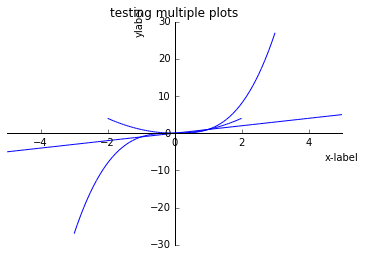

In [85]:
#multiple plots with different ranges
plot( (x, (x,-5,5)), (x**2, (x,-2,2)), (x**3, (x,-3,3)), 
     title='testing multiple plots',
     xlabel='x-label',
     ylabel='ylabel')

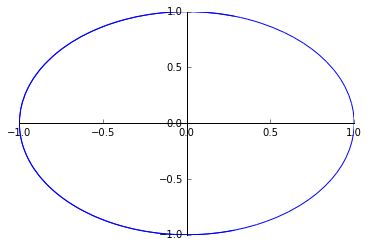

In [86]:
# parametric plots
from sympy import symbols, cos,sin
from sympy.plotting import plot_parametric
u = symbols('x')
plot_parametric(cos(u), sin(u), (u,-5,5))

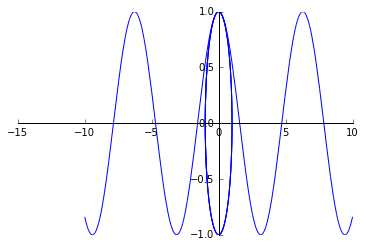

In [87]:
#multiple parametric plots with a single range
plot_parametric((cos(u), sin(u)), (u,cos(u)))

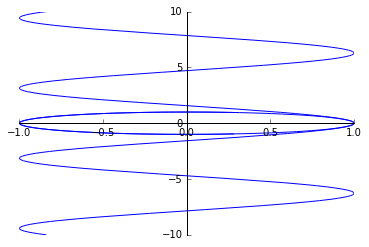

In [88]:
# multiple parametric plots with multiple ranges
plot_parametric((cos(u), sin(u), (u,-5,5)), (cos(u), u, (u,-10,10)))

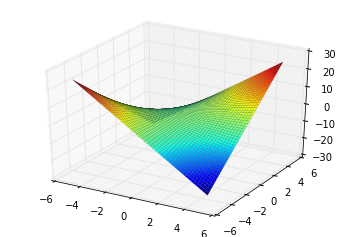

In [89]:
# 3d plots
from sympy import symbols
from sympy.plotting import plot3d
x,y = symbols('x,y')
plot3d(x*y, (x,-5,5), (y,-5,5))

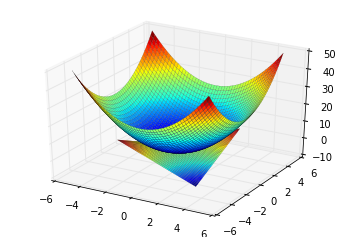

In [90]:
# multiple plots with multiple ranges
plot3d((x**2+y**2, (x,-5,5), (y,-5,5)) , (x*y, (x,-3,3), (y,-3,3)))

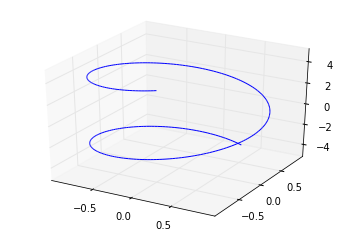

In [91]:
# 3d parametric plots
from sympy import symbols, sin,cos
from sympy.plotting import plot3d_parametric_line
u = symbols('u')
plot3d_parametric_line(cos(u), sin(u), u, (u,-5,5))

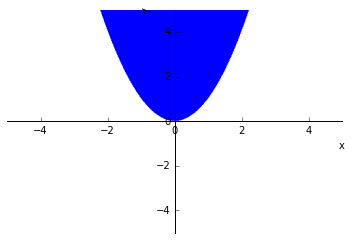

In [92]:
#plotting regions
p6 = plot_implicit(y>x**2)

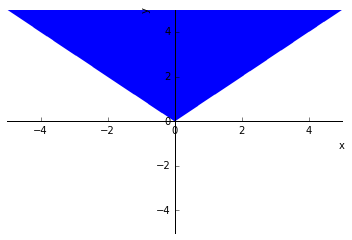

In [93]:
#plotting using boolean
p7 = plot_implicit(And(y>x, y >=-x))

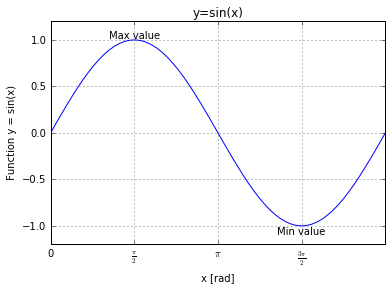

In [97]:
from numpy import pi, sin
I = np.arange(0, 2*pi+0.1, 0.1)
plt.plot(I,sin(I), label='sin(I)')
plt.title('y=sin(x)')
plt.xlabel('x [rad]')
plt.ylabel(' Function y = sin(x)')
plt.text(pi/2,1, 'Max value', ha = 'center', va='bottom')
plt.text(3*pi/2,-1, 'Min value', ha = 'center', va='top')
plt.xticks(np.arange(0, 2*pi, pi/2), 
       ('0', r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$'))
plt.xlim([0, 2*pi])
plt.ylim([-1.2, 1.2])
plt.grid() 

In [ ]:
get_ipython().magic('matplotlib')  # seperate window

from pysketcher import *

L = 8.0
H = 1.0
xpos = 2.0
ypos = 3.0

drawing_tool.set_coordinate_system(xmin=0, xmax=xpos+1.2*L,
                                   ymin=0, ymax=ypos+5*H,
                                   axis=True)
drawing_tool.set_linecolor('blue')
drawing_tool.set_grid(True)
drawing_tool.set_fontsize(22)

P0 = point(xpos,ypos)
main = Rectangle(P0, L, H)
h = L/16  # size of support, clamped wall etc
support = SimplySupportedBeam(P0, h)
clamped = Rectangle(P0 + point(L, 0) - point(0,2*h), h, 6*h).set_filled_curves(pattern='/')
F_pt = point(P0[0]+L/2, P0[1]+H)
force = Force(F_pt + point(0,2*H), F_pt, '$F$').set_linewidth(3)
L_dim = Distance_wText((xpos,P0[1]-3*h), (xpos+L,P0[1]-3*h), '$L$')
beam = Composition({'main': main, 'simply supported end': support,
                    'clamped end': clamped, 'force': force,
                    'L': L_dim})
beam.draw()
beam.draw_dimensions()
drawing_tool.display()

get_ipython().magic('matplotlib inline') # inline plotting

In [ ]:
get_ipython().magic('matplotlib')  # seperate window

from pysketcher import *

L = 8.0
H = 1.0
xpos = 2.0
ypos = 3.0

drawing_tool.set_coordinate_system(xmin=0, xmax=xpos+1.2*L,
                                   ymin=0, ymax=ypos+5*H,
                                   axis=True)
drawing_tool.set_linecolor('blue')
drawing_tool.set_grid(True)
drawing_tool.set_fontsize(22)

P0 = point(xpos,ypos)
main = Rectangle(P0, L, H)
h = L/16  # size of support, clamped wall etc
support = SimplySupportedBeam(P0, h)
clamped = Rectangle(P0 + point(L, 0) - point(0,2*h), h, 6*h).set_filled_curves(pattern='/')
F_pt = point(P0[0]+L/2, P0[1]+H)
force = Force(F_pt + point(0,2*H), F_pt, '$F$').set_linewidth(3)
L_dim = Distance_wText((xpos,P0[1]-3*h), (xpos+L,P0[1]-3*h), '$L$')
beam = Composition({'main': main, 'simply supported end': support,
                    'clamped end': clamped, 'force': force,
                    'L': L_dim})
beam.draw()
beam.draw_dimensions()
drawing_tool.display()

get_ipython().magic('matplotlib inline') # inline plotting

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

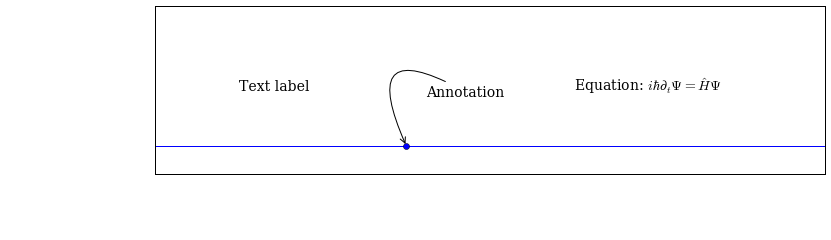

In [3]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=1.5"))

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

ax.annotate('arc3', xy=(0.5, -1), xycoords='data',
            xytext=(-30, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2")
            )

ax.annotate('arc', xy=(1., 1), xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=30,rad=10"),
            )

ax.annotate('arc', xy=(1.5, -1), xycoords='data',
            xytext=(-40, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=20,angleB=-90,armB=15,rad=7"),
            )
plt.show()

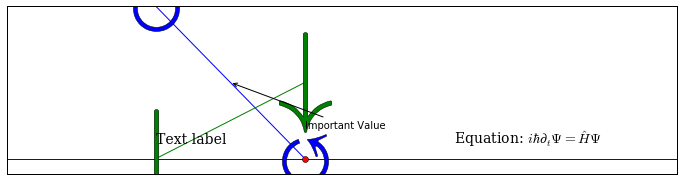

In [4]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-1, 3.5)
ax.set_ylim(-0.1, 1)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

plt.annotate("Important Value", (.5,.5), xycoords='data',xytext=(1,.2), arrowprops=dict(arrowstyle='->'))


ax.plot([1,0],marker=r'$\circlearrowleft$',ms=50)
ax.plot([0,.5],marker=r'$\downarrow$',ms=100)

ax.plot(1, 0, 'o')